# LAB 6 - Uczenie ze wzmocnieniem

Przykład wywołania algorytmu qlearning:

In [1]:
import gymnasium as gym
from qlearning import Agent, rate_policy
import numpy as np

env = gym.make("Taxi-v3")
ag = Agent(0, 0.8, 0.75, 0.985, env)
ag.train_agent(2000, 200)
rewards, success_rate = rate_policy(ag.get_policy(), "Taxi-v3", 500, 0.985)
print(f"Po trenowaniu: Średni wynik {np.average(rewards)} Szansa na sukces {success_rate}")

Po trenowaniu: Średni wynik 5.502634312787899 Szansa na sukces 1.0


## Eksperyment 1 - Epsilon
W tym eksperymencie zbadany będzie wpływ wartości współczynnika odcięcia epsilon na dynamikę trenowania agenta. Reszta hiperparametrów będzie miała następujące wartości:
- wsp. uczenia = 0.5
- horyzont = 50

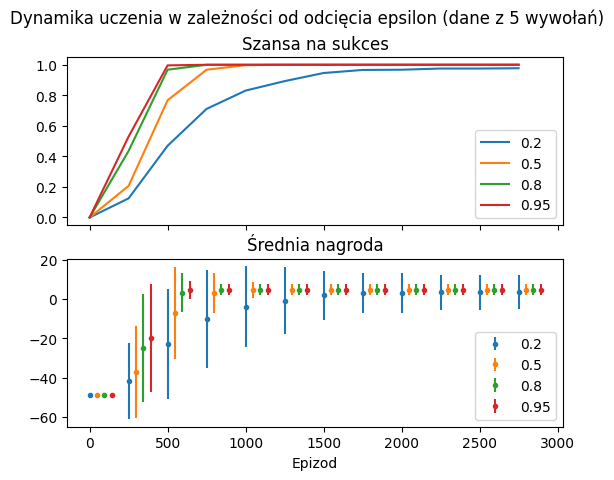

In [2]:
from graphs import plot_hiperparam_comparisons

agents = 5
spareseness = 250
episodes = 3000
# RUNS      1       2       3       4
epsilons = [0.2, 0.5, 0.8, 0.95]
lrs = [0.5, 0.5, 0.5, 0.5]
horizons = [50, 50, 50, 50]
labels = list(map(str, epsilons))

plot_hiperparam_comparisons(agents, spareseness, episodes, epsilons, lrs, horizons, "Taxi-v3", labels,
                            "Dynamika uczenia w zależności od odcięcia epsilon")

## Wnioski:
Z zebranych danych wynika że dla tego środowiska im większy jest współczynnik epsilon tym szybciej się on uczy. Jest to najprawdopodobniej spowodowane tym, że środowisko taxi jest bardzo ograniczone, przestrzeń stanów ma zaledwie 500 elementów oraz ilość dostępnych akcji jest bardzo mała. Algorytm prioretyziujący eksplorację dużo szybciej przeszuka większą ilość stanów, stąd większy epsilon oznacza szybsze uczenie. Wedle zebranych danych optymalnym epsilonem była by na przykład wartość 0.8.

## Eksperyment 2 - Współczynnik uczenia
W tym eksperymencie zbadany będzie wpływ współczynnika uczenia na dynamikę trenowania agenta. Reszta hiperparametrów będzie miała następujące wartości:
- epsilon = 0.8
- horyzont = 50

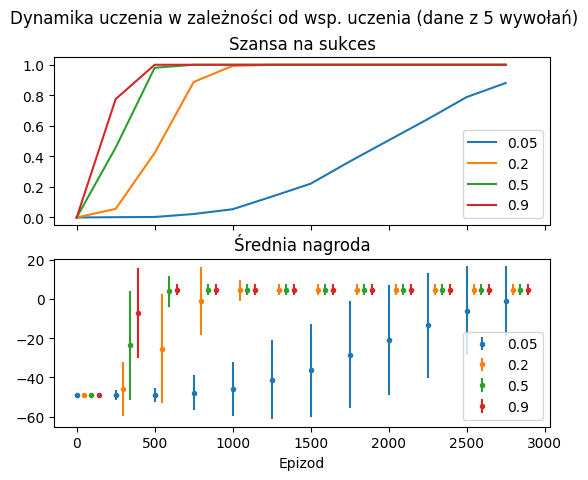

In [3]:
from graphs import plot_hiperparam_comparisons

agents = 5
spareseness = 250
episodes = 3000
# RUNS      1       2       3       4       5
epsilons = [0.8, 0.8, 0.8, 0.8]
lrs = [0.05, 0.2, 0.5, 0.9]
horizons = [50, 50, 50, 50]
labels = list(map(str, lrs))

plot_hiperparam_comparisons(agents, spareseness, episodes, epsilons, lrs, horizons, "Taxi-v3", labels,
                            "Dynamika uczenia w zależności od wsp. uczenia")

## Wnioski:
Z zebranych danych wynika, że im większy jest współczynnik uczenia, tym szybciej zostanie wytrenowany agent. Optymalną wartością współczynnika uczenia będzie wartość około 0.8.

## Eksperyment 3 - horyzont
W tym ekpserymencie zbadany zostanie wpływ horyzontu na dynamikę trenowania agenta. Dyskont jest wyliczany z horyzontu wzorem (1 - 1/H). Dyskont wpływa jak daleko w przyszłość stara się patrzeń algorytm. Pozostałe hiper parametry mają poniższe wartości:
- epsilon = 0.8
- wsp. uczenia = 0.5

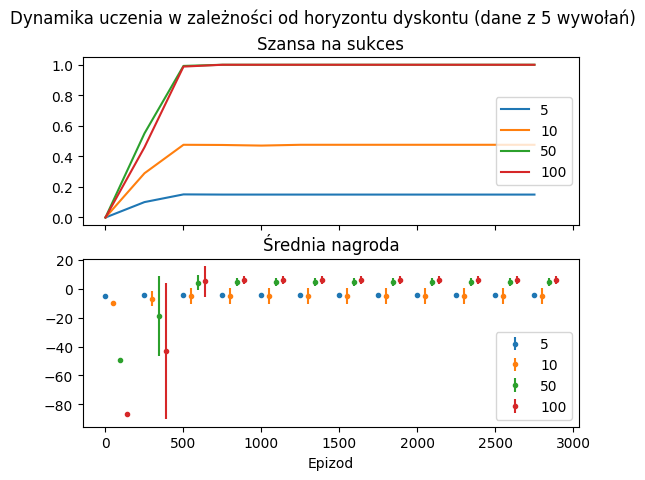

In [4]:
from graphs import plot_hiperparam_comparisons

agents = 5
spareseness = 250
episodes = 3000
# RUNS      1       2       3       4
epsilons = [0.8, 0.8, 0.8, 0.8]
lrs = [0.5, 0.5, 0.5, 0.5]
horizons = [5, 10, 50, 100]
labels = list(map(str, horizons))

plot_hiperparam_comparisons(agents, spareseness, episodes, epsilons, lrs, horizons, "Taxi-v3", labels, "Dynamika uczenia w zależności od horyzontu dyskontu")

## Wnioski
W tym wypadku wyres średniej nagrody nie jest porównywalny dla różnych wartości horyzontu, gdyż lliczenie nagrody zależy od dyskontu.

Jeśli algorytm nie przejmuje się przyszłymi nagrodami (horyzont/dyskont jest mały), to ma problemy z uczeniem się optymalnej polityki. Dla wartości powyżej 50 natomiast sytuacja się poprawia, i algorytm jest w stanie się nauczyć jak reagować na środowisko. Optymalną wartością horyzontu jest np. wartość 75.